In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import dask.dataframe as dd

In [2]:
date_cols = ['weight_date', 'date', 'event_date', 'lab_date',
               'height_date', 'cpt_date', 'measure_date', 'survey_date']
cols_to_use = ['patient_id', 'weight', 'pregnancy_ind', 'file_type', 'value',
              'sex', 'age', 'bmi'] + date_cols

In [3]:
use_dask = False

if use_dask:
    raw_data = dd.read_csv('../data/raw/all_measure_long.csv', 
                       encoding='latin-1',
                       low_memory=False,
                       parse_dates=date_cols,
                       usecols=cols_to_use)
else:
    raw_data = pd.read_csv('../data/raw/all_measure_long.csv', encoding='latin-1')
raw_data.head()

/Users/fonnescj/anaconda3/envs/bmi/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (0,6,7,9,10,11,12,15,18,21,23,85,95,96,98,103,142,147,148,149,150,152,153,154,167,168,169,198,199,200,201,202,203,235,236,237,241,242,243,244) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,weight_date,weight,pregnancy_ind,date,file_type,value,event_date,icd_code,code_type,lab_date,...,survey_timestamp,survey_date,patient_id_vandy,d1,m1,y1,mrn1,study_id,greenwayid,patient_id_jackson
0,07/30/2015,192.0,0.0,07/30/2015,weight,192,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,04/29/2010,134.0,0.0,04/29/2010,weight,134,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,07/15/2015,182.0,0.0,07/15/2015,weight,182,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,08/02/2010,249.0,0.0,08/02/2010,weight,249,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,05/07/2012,143.0,0.0,05/07/2012,weight,143,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


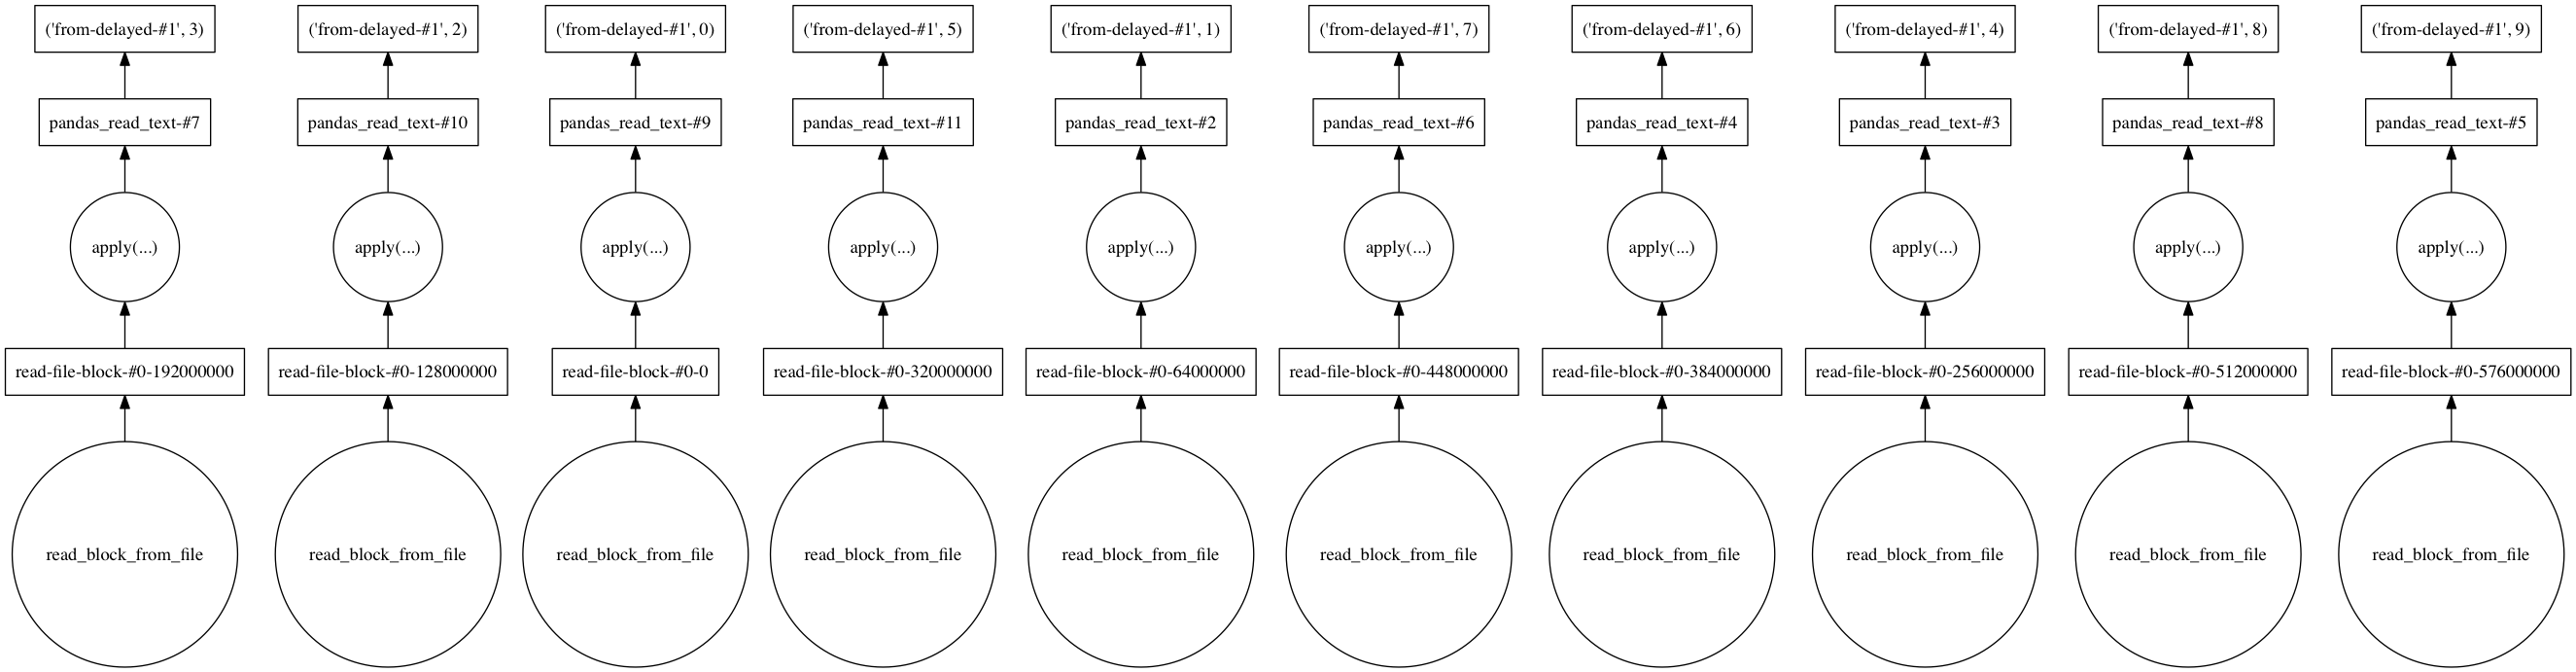

In [11]:
raw_data.visualize()

In [9]:
raw_data.patient_id.unique().shape

(19557,)

In [10]:
raw_data.patient_id.str.lstrip('0').unique().shape

(15436,)

In [11]:
raw_data.patient_id_vandy.unique().shape

(7393,)

In [8]:
raw_data.patient_id_jackson.unique().shape

(6005,)

In [14]:
raw_data.greenwayid.unique().shape

(1453,)

In [15]:
(raw_data.greenwayid.unique().shape[0] +
 raw_data.patient_id_jackson.unique().shape[0] +
 raw_data.patient_id_vandy.unique().shape[0])

14851

In [5]:
column_names = raw_data.columns.tolist()

In [14]:
raw_data.columns[raw_data.columns.str.endswith('id')]

Index(['patient_id', 'site_id', 'jacksonid', 'participantid', 'Bid', 'Aid',
       'study_id', 'greenwayid'],
      dtype='object')

In [5]:
data_by_patient = raw_data.groupby('patient_id')

In [11]:
dd.compute(raw_data.weight.min(), raw_data.weight.max())

/Users/fonnescj/anaconda3/envs/dev/lib/python3.5/site-packages/dask/async.py:263: DtypeWarning: Columns (0,6,7,9,10,11,12,15) have mixed types. Specify dtype option on import or set low_memory=False.
  result = _execute_task(task, data)


ValueError: could not convert string to float: '03/01/2013'

Traceback
---------
  File "/Users/fonnescj/anaconda3/envs/dev/lib/python3.5/site-packages/dask/async.py", line 263, in execute_task
    result = _execute_task(task, data)
  File "/Users/fonnescj/anaconda3/envs/dev/lib/python3.5/site-packages/dask/async.py", line 245, in _execute_task
    return func(*args2)
  File "/Users/fonnescj/anaconda3/envs/dev/lib/python3.5/site-packages/dask/compatibility.py", line 47, in apply
    return func(*args, **kwargs)
  File "/Users/fonnescj/anaconda3/envs/dev/lib/python3.5/site-packages/dask/dataframe/csv.py", line 49, in bytes_read_csv
    coerce_dtypes(df, dtypes)
  File "/Users/fonnescj/anaconda3/envs/dev/lib/python3.5/site-packages/dask/dataframe/csv.py", line 74, in coerce_dtypes
    df[c] = df[c].astype(dtypes[c])
  File "/Users/fonnescj/anaconda3/envs/dev/lib/python3.5/site-packages/pandas/core/generic.py", line 3054, in astype
    raise_on_error=raise_on_error, **kwargs)
  File "/Users/fonnescj/anaconda3/envs/dev/lib/python3.5/site-packages/pandas/core/internals.py", line 3168, in astype
    return self.apply('astype', dtype=dtype, **kwargs)
  File "/Users/fonnescj/anaconda3/envs/dev/lib/python3.5/site-packages/pandas/core/internals.py", line 3035, in apply
    applied = getattr(b, f)(**kwargs)
  File "/Users/fonnescj/anaconda3/envs/dev/lib/python3.5/site-packages/pandas/core/internals.py", line 462, in astype
    values=values, **kwargs)
  File "/Users/fonnescj/anaconda3/envs/dev/lib/python3.5/site-packages/pandas/core/internals.py", line 505, in _astype
    values = _astype_nansafe(values.ravel(), dtype, copy=True)
  File "/Users/fonnescj/anaconda3/envs/dev/lib/python3.5/site-packages/pandas/types/cast.py", line 537, in _astype_nansafe
    return arr.astype(dtype)


/Users/fonnescj/anaconda3/envs/dev/lib/python3.5/site-packages/dask/async.py:263: DtypeWarning: Columns (21,23) have mixed types. Specify dtype option on import or set low_memory=False.
  result = _execute_task(task, data)
